<a href="https://colab.research.google.com/github/shamsa19/kmeans_manhattan/blob/main/kmeans_manhattan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def plot_manhattan_vs_euclidean():
    points = np.array([
        [2, 3],
        [3, 5],
        [6, 2],
        [7, 4],
        [5, 7]
    ])


    centroid = np.array([4, 4])

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))


    ax[0].scatter(points[:, 0], points[:, 1], color='blue', label='Points')
    ax[0].scatter(centroid[0], centroid[1], color='red', marker='X', s=100, label='Centroid')
    for pt in points:

        ax[0].plot([pt[0], pt[0], centroid[0]], [pt[1], centroid[1], centroid[1]], linestyle='--', color='gray')
    ax[0].set_title('Manhattan Distance')
    ax[0].grid(True)
    ax[0].legend()
    ax[0].set_aspect('equal')


    ax[1].scatter(points[:, 0], points[:, 1], color='blue', label='Points')
    ax[1].scatter(centroid[0], centroid[1], color='red', marker='X', s=100, label='Centroid')
    for pt in points:
        ax[1].plot([pt[0], centroid[0]], [pt[1], centroid[1]], linestyle='--', color='gray')
    ax[1].set_title('Euclidean Distance')
    ax[1].grid(True)
    ax[1].legend()
    ax[1].set_aspect('equal')

    plt.suptitle("Visual Comparison of Distance Metrics", fontsize=16)
    plt.tight_layout()
    plt.show()


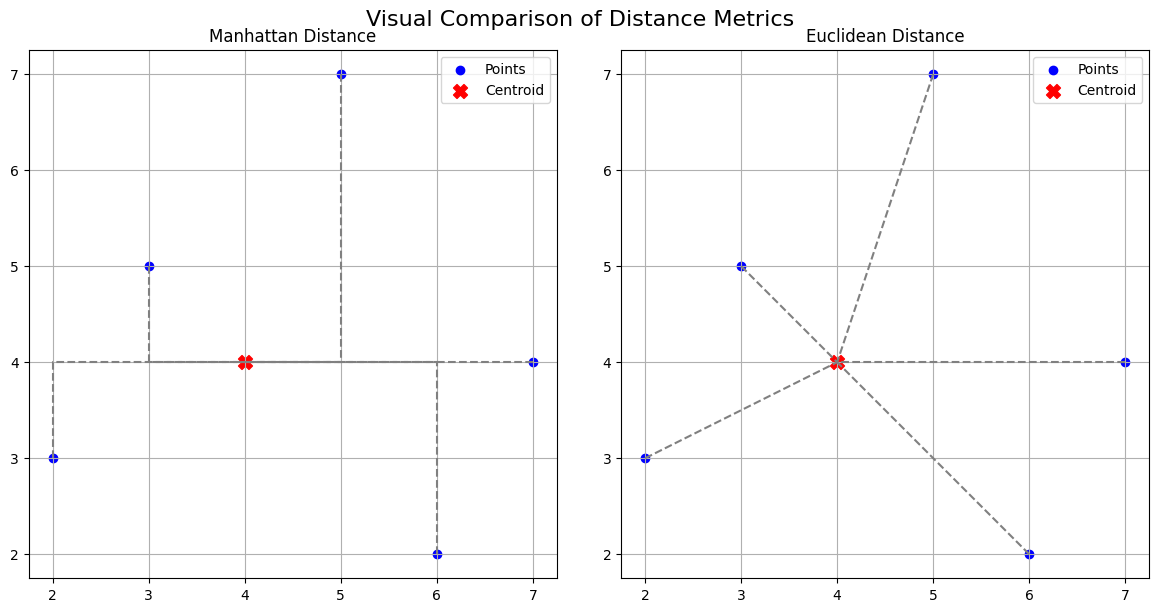

In [44]:
plot_manhattan_vs_euclidean()

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import astronaut
from skimage.util import img_as_float
from skimage import img_as_ubyte


def manhattan_distance(pixels, centroids):
    return np.sum(np.abs(pixels[:, None] - centroids[None, :]), axis=2)


def initialize_centroids(image, k):
    H, W, C = image.shape
    centroids = []


    centroids.append(image[H // 2, W // 2])


    step_h = H // (k // 2 + 1)
    step_w = W // (k // 2 + 1)

    for i in range(1, k):
        y = (i * step_h) % H
        x = (i * step_w) % W
        centroids.append(image[y, x])

    return np.array(centroids)


def kmeans_manhattan(image, k=5, max_iters=10):
    H, W, C = image.shape
    pixels = image.reshape(-1, C)

    centroids = initialize_centroids(image, k)

    for i in range(max_iters):
        distances = manhattan_distance(pixels, centroids)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([
            pixels[labels == j].mean(axis=0) if np.any(labels == j)
             else centroids[j] for j in range(k)])


        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids


    segmented_img = centroids[labels].reshape(H, W, C)
    return segmented_img, labels.reshape(H, W) #which pixel belongs to which cluster






In [37]:
def visualize_clusters_by_centroid_color(label_map, centroids):
    k = centroids.shape[0]
    H, W = label_map.shape
    fig, axes = plt.subplots(1, k, figsize=(4 * k, 4))

    for i in range(k):

        cluster_color_image = np.zeros((H, W, 3))
        mask = (label_map == i)
        cluster_color_image[mask] = centroids[i]  # Apply centroid color to the mask

        axes[i].imshow(cluster_color_image)
        axes[i].set_title(f'Cluster {i}', fontsize=14)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


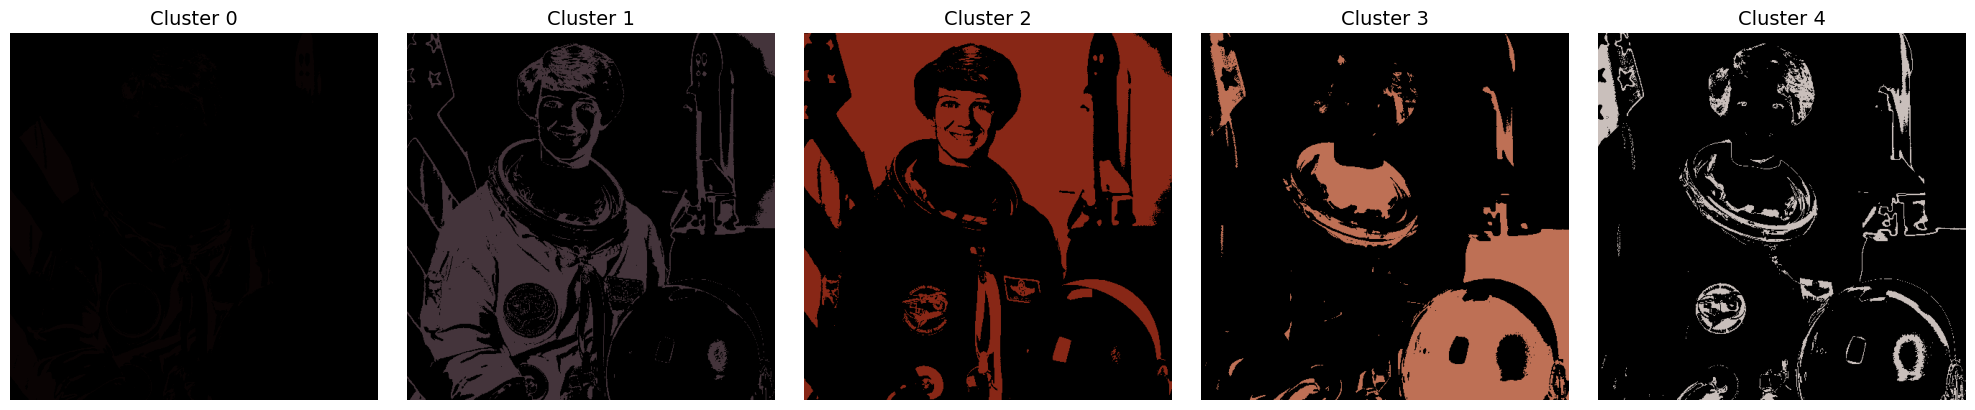

In [38]:
image = img_as_float(astronaut())
k = 5

segmented_img, label_map = kmeans_manhattan(image, k=k)

pixels = image.reshape(-1, 3)
centroids = np.unique(segmented_img.reshape(-1, 3), axis=0)
visualize_clusters_by_centroid_color(label_map, centroids)


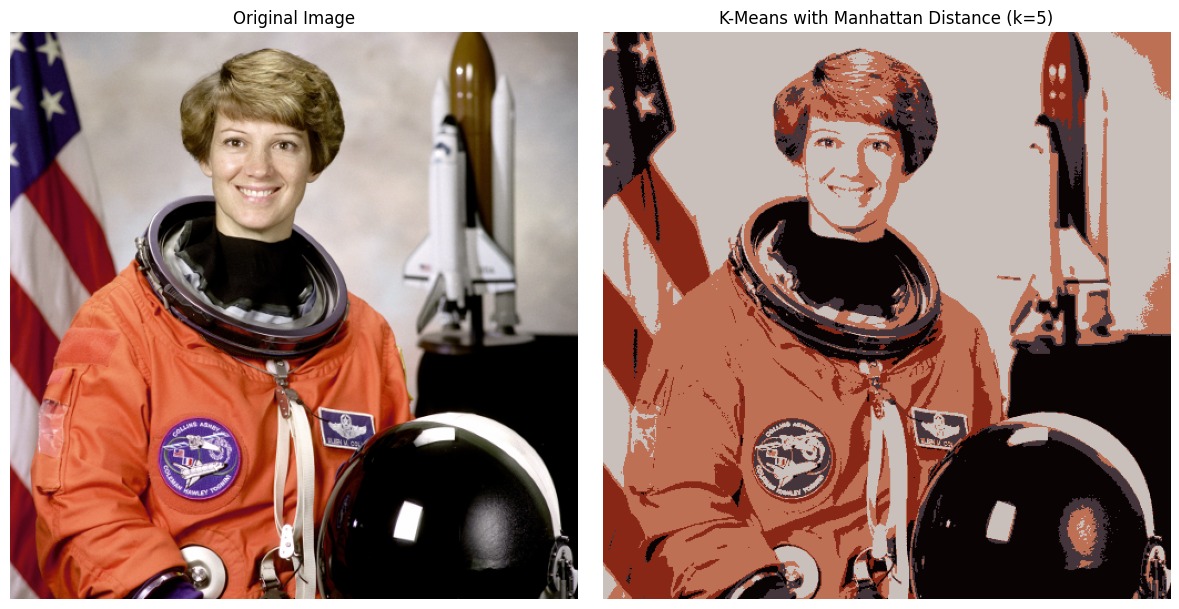

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(segmented_img)
ax[1].set_title(f"K-Means with Manhattan Distance (k={k})")
ax[1].axis("off")

plt.tight_layout()
plt.show()